In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.express as px

In [2]:
# assign the URL and create a GET request
url = 'https://www.tsa.gov/coronavirus/passenger-throughput'
req = requests.get(url)
req

<Response [200]>

In [3]:
# select the table that will be used.
soup = BeautifulSoup(req.content, 'lxml')
table = soup.find_all('table')[0]
display(table)

<table class="views-table views-view-table cols-4 sticky-enabled">
<thead>
<tr>
<th class="views-align-center views-field views-field-field-today-date views-align-center" id="view-field-today-date-table-column" scope="col">Date</th>
<th class="views-align-center views-field views-field-field-2021-throughput views-align-center" id="view-field-2021-throughput-table-column" scope="col">2021 Traveler Throughput </th>
<th class="views-align-center views-field views-field-field-2020-throughput views-align-center" id="view-field-2020-throughput-table-column" scope="col">2020 Traveler Throughput </th>
<th class="views-align-center views-field views-field-field-2019-throughput views-align-center" id="view-field-2019-throughput-table-column" scope="col">2019 Traveler Throughput </th>
</tr>
</thead>
<tbody>
<tr>
<td class="views-field views-field-field-today-date views-align-center" headers="view-field-today-date-table-column">3/10/2021          </td>
<td class="views-field views-field-field-2021

In [4]:
# transitioning to a Pandas DataFrame
df = pd.read_html(str(table))[0]
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
Date,,,
2021-03-10,955177.0,1617220,2122898
2021-03-09,823210.0,1909363,2378673
2021-03-08,1117939.0,2119867,2485430
2021-03-07,1277719.0,1844811,2156262
2021-03-06,991547.0,2198517,2543689
...,...,...,...
2020-08-27,NaN,721060,2561109
2020-08-26,NaN,540043,2188688
2020-08-25,NaN,523186,2015088


In [8]:
#Truncating the column names to something simpler.
df = df.rename(columns={"2021 Traveler Throughput":"Present",
                        "2020 Traveler Throughput":"One Year Ago"})
df

,Present,One Year Ago,2019 Traveler Throughput
Date,,,
2021-03-10,955177.0,1617220,2122898
2021-03-09,823210.0,1909363,2378673
2021-03-08,1117939.0,2119867,2485430
2021-03-07,1277719.0,1844811,2156262
2021-03-06,991547.0,2198517,2543689
...,...,...,...
2020-08-27,NaN,721060,2561109
2020-08-26,NaN,540043,2188688
2020-08-25,NaN,523186,2015088


In [14]:
# calculate the difference between the two time periods
df['Difference in Travelers'] = df['Present'].sub(df['One Year Ago'])
df['% Change'] = df['Present'].sub(df['One Year Ago']).div(df['One Year Ago'])
df.head()

,Present,One Year Ago,2019 Traveler Throughput,Difference in Travelers,% Change
Date,,,,,
2021-03-10,955177.0,1617220,2122898,-662043.0,-0.409371
2021-03-09,823210.0,1909363,2378673,-1086153.0,-0.568856
2021-03-08,1117939.0,2119867,2485430,-1001928.0,-0.472637
2021-03-07,1277719.0,1844811,2156262,-567092.0,-0.307398
2021-03-06,991547.0,2198517,2543689,-1206970.0,-0.548993


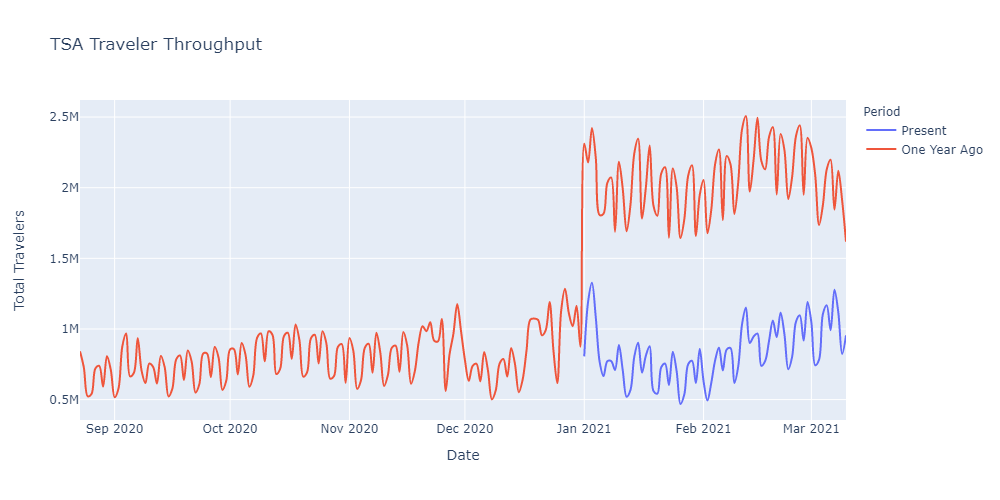

In [13]:
# Use plotly.express to create a line chart visualization
fig = px.line(df, y=['Present',
                     'One Year Ago'],
              line_shape='spline',
              title='TSA Traveler Throughput',
              labels={'value':'Total Travelers',
                      'variable':'Period'})
fig.show(renderer='png', height=500, width=1000)